# This notebook contains queries and visualizations for the Chinook Analysis using SQL project

In [ ]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
engine = create_engine('sqlite:///chinook.db')

## Query 1

### Who is the top 10 customers?
* The customer who has spent the most money will be declared the best customer.
*  Build a query that returns the person who has spent the most money.

In [ ]:
q11 = '''
SELECT c.CustomerId, c.FirstName , sum(i.total) Total , sum(il.unitprice) Price
FROM customer c 
JOIN Invoice I
ON c.CustomerId = I.CustomerId
JOIN InvoiceLine Il 
on I.InvoiceId = il.InvoiceId
group by I.CustomerId
order by price DESC 
Limit 10
'''
# /*Query 1*/


In [ ]:
df1 = pd.read_sql(q11, engine)
df1

,CustomerId,FirstName,Total,Price
0,6,Helena,502.62,49.62
1,26,Richard,474.62,47.62
2,57,Luis,415.62,46.62
3,45,Ladislav,446.62,45.62
4,46,Hugh,446.62,45.62
5,37,Fynn,388.62,43.62
6,24,Frank,378.62,43.62
7,28,Julia,370.62,43.62
8,25,Victor,404.62,42.62
9,7,Astrid,404.62,42.62


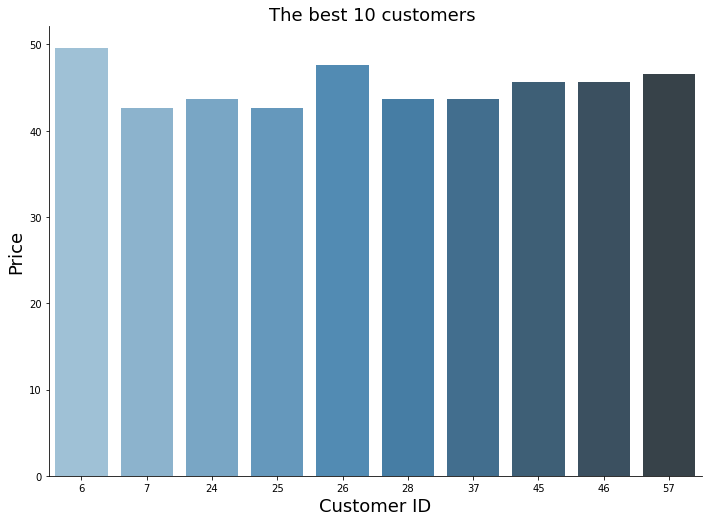

In [ ]:
from numpy.core.fromnumeric import size
# Lets see the distribution of top-spenders along countries
fig, _ = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.despine()
_ = sns.barplot(x=df1.CustomerId, y=df1.Price , palette='Blues_d')
plt.xlabel("Customer ID", fontsize=18 )
plt.ylabel("Price", fontsize=18)
plt.title("The best 10 customers ", fontsize=18)
plt.savefig("fig")
plt.show(fig)
### To save the plot


## Query 2 
### Question 3: Who is writing the rock music?
* Now that we know that our customers love rock music, we can decide which musicians to invite to play at the concert.
* Let's invite the artists who have written the most rock music in our dataset.
* Write a query that returns the Artist name and total track count of the top 10 rock bands.
* You will need to use the Genre, Track , Album, and Artist tables.

In [33]:
q22 = '''
Select  A.ArtistId ,  A.name , count(t.name)  as Songs 
From artist A                                    
join Album Al On A.ArtistId = Al.ArtistId
join Track t On Al.AlbumId = T.AlbumId         
Join Genre G On g.GenreId = t.GenreId
where g.name = 'Rock'
group by 1
order by 3  Desc 
Limit 10
'''

In [34]:
df1 = pd.read_sql(q22, engine)
df1

,ArtistId,Name,Songs
0,22,Led Zeppelin,114
1,150,U2,112
2,58,Deep Purple,92
3,90,Iron Maiden,81
4,118,Pearl Jam,54
5,152,Van Halen,52
6,51,Queen,45
7,142,The Rolling Stones,41
8,76,Creedence Clearwater Revival,40
9,52,Kiss,35


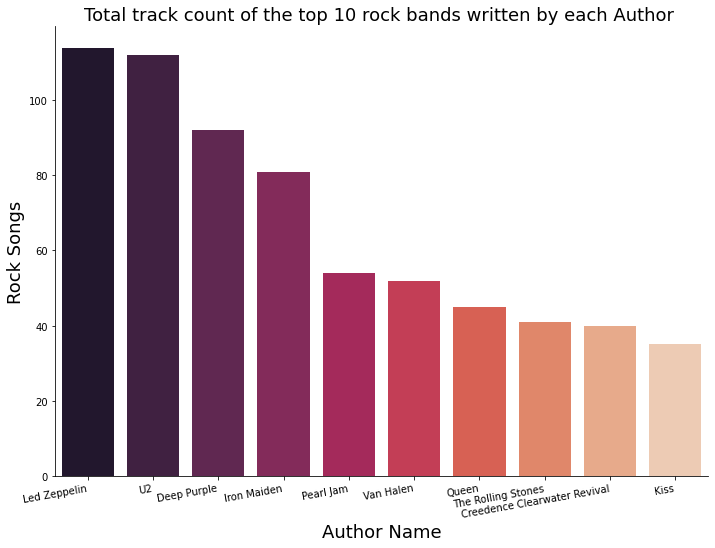

In [36]:
from numpy.core.fromnumeric import size
# Lets see the distribution of top-spenders along countries
fig, _ = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.despine()
_ = sns.barplot(x=df1.Name, y=df1.Songs , palette='rocket')
plt.xlabel("Author Name", fontsize=18 )
plt.ylabel("Rock Songs", fontsize=18)
plt.title("Total track count of the top 10 rock bands written by each Author ", fontsize=18)
_.set_xticklabels(_.get_xticklabels(), rotation=10, ha="right")

plt.savefig("fig")
plt.show(fig)
### To save the plot


# Query 3
# Who are the best selling Artists?
* find which artist has earned the most according to the InvoiceLines? 



In [5]:
q33 = '''
Select  A.artistid, A.name   ,
		sum(il.UnitPrice) as Purchased_songs --count(il.Quantity) as Il_quantity,

		From artist A                                    
        join Album Al On A.ArtistId = Al.ArtistId
        join Track t On Al.AlbumId = T.AlbumId              
        Join InvoiceLine Il On il.trackId = t.trackId   
		group by A.artistId
		order by purchased_songs Desc
		limit 10
'''


In [6]:
new_df1 = pd.read_sql(q33, engine)
new_df1

,ArtistId,Name,Purchased_songs
0,90,Iron Maiden,138.60
1,150,U2,105.93
2,50,Metallica,90.09
3,22,Led Zeppelin,86.13
4,149,Lost,81.59
5,156,The Office,49.75
6,113,Os Paralamas Do Sucesso,44.55
7,58,Deep Purple,43.56
8,82,Faith No More,41.58
9,81,Eric Clapton,39.60


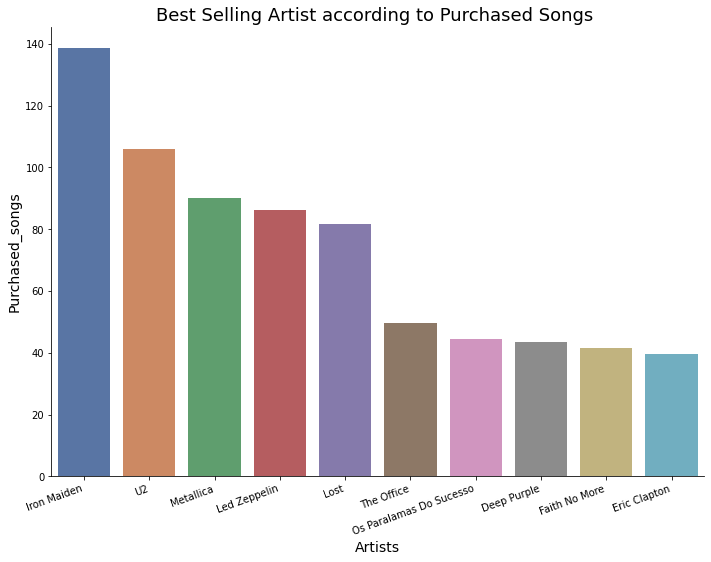

In [32]:
# Lets see the distribution of top-spenders along countries
fig, _ = plt.subplots()
fig.set_size_inches(11.7, 8.27)

sns.despine()
_ = sns.barplot(y=new_df1.Purchased_songs, x=new_df1.Name, palette='deep')
plt.xlabel("Artists",fontsize=14)
plt.ylabel("Purchased_songs",fontsize=14)
plt.title("Best Selling Artist according to Purchased Songs ",fontsize=18)
_.set_xticklabels(_.get_xticklabels(), rotation=20, ha="right")

plt.savefig("fig")
plt.show(fig)

In [ ]:
# Old
df1 = pd.read_sql(q33, engine)
df1

,ArtistId,Name,Il_quantity,Amount_Spent,Purchased_songs
0,90,Iron Maiden,140,138.60,19404.00
1,150,U2,107,105.93,11334.51
2,50,Metallica,91,90.09,8198.19
3,22,Led Zeppelin,87,86.13,7493.31
4,149,Lost,41,81.59,3345.19
5,113,Os Paralamas Do Sucesso,45,44.55,2004.75
6,58,Deep Purple,44,43.56,1916.64
7,82,Faith No More,42,41.58,1746.36
8,81,Eric Clapton,40,39.60,1584.00
9,124,R.E.M.,39,38.61,1505.79


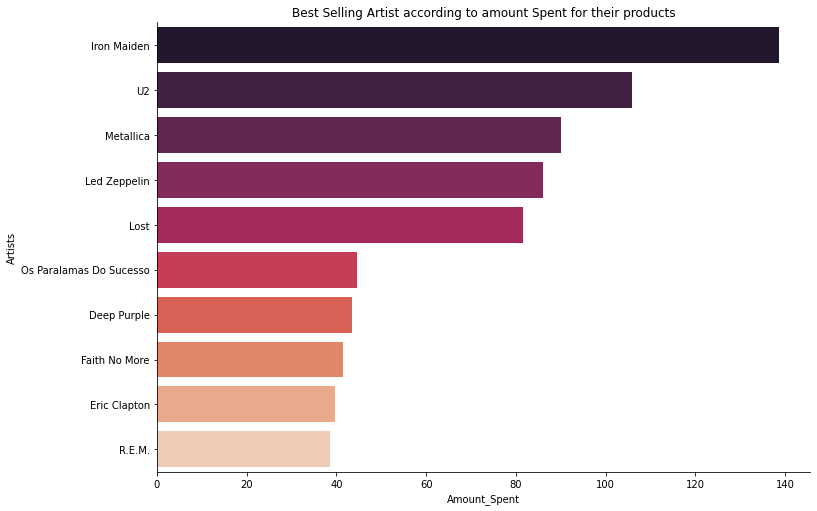

In [ ]:
# Lets see the distribution of top-spenders along countries
fig, _ = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.despine()
_ = sns.barplot(x=df1.pu, y=df1.Name, palette='deep')
plt.xlabel("Amount_Spent")
plt.ylabel("Artists")
plt.title("Best Selling Artist according to amount Spent for their products")
plt.savefig("fig")
plt.show(fig)

## Question 4 What are the top 10 countries purchasing Rock Music?

In [ ]:
q44 = '''
Select  c.Country , sum(il.UnitPrice) Purchasing_Amount, c.CustomerId CustomerId 
		From artist A                                     
        join Album Al On A.ArtistId = Al.ArtistId
        join Track t On Al.AlbumId = T.AlbumId              
        Join InvoiceLine Il On il.trackId = t.trackId   
        Join Invoice I  On I.InvoiceId = il.InvoiceId
		    join customer c ON c.CustomerId = I.CustomerId
    WHERE g.Name = 'Rock'
	group by  c.country
	order by Purchasing_Amount Desc
  Limit 10
'''

In [ ]:
df4 = pd.read_sql(q44, engine)
df4

,Country,Purchasing_Amount,CustomerId
0,USA,523.06,25
1,Canada,303.96,29
2,France,195.10,42
3,Brazil,190.10,12
4,Germany,156.48,37
5,United Kingdom,112.86,54
6,Czech Republic,90.24,6
7,Portugal,77.24,35
8,India,75.26,58
9,Chile,46.62,57


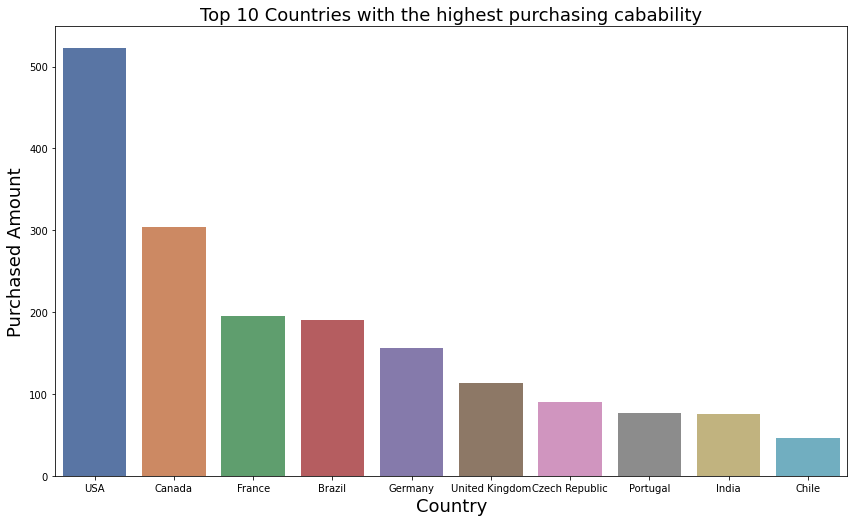

In [ ]:
fig, _ = plt.subplots()
fig.set_size_inches(14.2, 8.27)
_ = sns.barplot(x=df4.Country, y=df4.Purchasing_Amount, palette='deep') #'Blues_d'
plt.xlabel("Country",fontsize=18)
plt.ylabel("Purchased Amount",fontsize=18)
plt.title("Top 10 Countries with the highest purchasing cabability",fontsize=18)
plt.savefig("fig")
plt.show(fig)


#Query 5
### What are the top 8 Customers who spent the most on the best Selling Artist; Iron Maiden?

 * Now use this artist to find which customer spent the most on this artist.

 * For this query, you will need to use the Invoice, InvoiceLine, Track, Customer, Album, and Artist tables.

* Notice, this one is tricky because the Total spent in the Invoice table might not be on a single product, 
* so you need to use the InvoiceLine table to find out how many of each product was purchased,
* and then multiply this by the price for each artist.


In [37]:
q55 = '''
Select A.name Name, sum(il.UnitPrice) AmountSpent, c.CustomerId CustomerId, c.firstname FirstName ,  c.LastName LastName 

		From artist A                                     
        join Album Al On A.ArtistId = Al.ArtistId
        join Track t On Al.AlbumId = T.AlbumId              
        Join InvoiceLine Il On il.trackId = t.trackId   
        Join Invoice I  On I.InvoiceId = il.InvoiceId
		join customer c ON c.CustomerId = I.CustomerId

	Where   A.name = 'Iron Maiden' or A.ArtistId = 90 
	group by  c.CustomerId
	order by AmountSpent Desc
	Limit 8
  '''

In [38]:
df5 = pd.read_sql(q55, engine)
df5

,Name,AmountSpent,CustomerId,FirstName,LastName
0,Iron Maiden,17.82,55,Mark,Taylor
1,Iron Maiden,15.84,35,Madalena,Sampaio
2,Iron Maiden,13.86,16,Frank,Harris
3,Iron Maiden,13.86,36,Hannah,Schneider
4,Iron Maiden,8.91,5,František,Wichterlová
5,Iron Maiden,8.91,27,Patrick,Gray
6,Iron Maiden,5.94,19,Tim,Goyer
7,Iron Maiden,5.94,39,Camille,Bernard


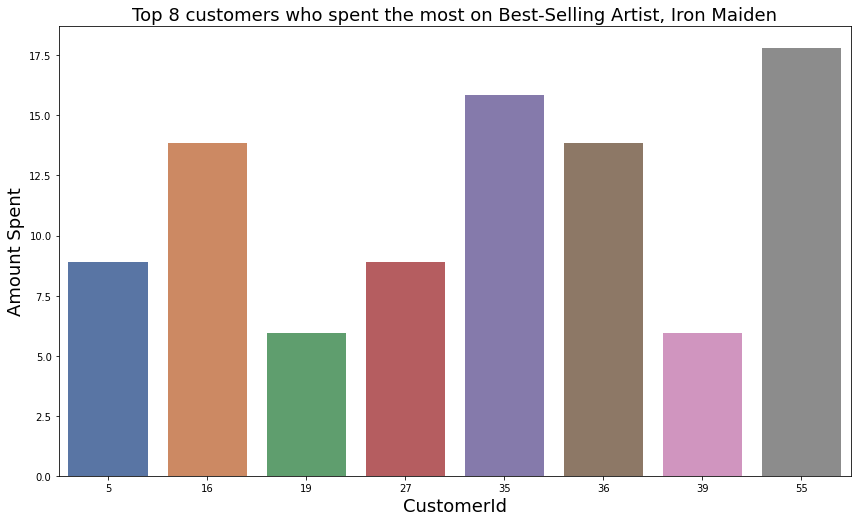

In [39]:
fig, _ = plt.subplots()
fig.set_size_inches(14.2, 8.27)
_ = sns.barplot(x=df5.CustomerId, y=df5.AmountSpent, palette='deep') #'Blues_d'
plt.xlabel("CustomerId",fontsize=18)
plt.ylabel("Amount Spent",fontsize=18)
plt.title("Top 8 customers who spent the most on Best-Selling Artist, Iron Maiden",fontsize=18)
plt.savefig("fig")
plt.show(fig)